In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

IMG_SIZE = 40

input_img = Input(shape=(IMG_SIZE, IMG_SIZE, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')



Using TensorFlow backend.
W0726 17:44:39.244227 140122518841152 module_wrapper.py:136] From /home/sysadm/Workspace/jupyter/env/lib/python3.6/site-packages/tensorflow_core/python/util/module_wrapper.py:163: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0726 17:44:39.258230 140122518841152 module_wrapper.py:136] From /home/sysadm/Workspace/jupyter/env/lib/python3.6/site-packages/tensorflow_core/python/util/module_wrapper.py:163: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0726 17:44:39.287600 140122518841152 module_wrapper.py:136] From /home/sysadm/Workspace/jupyter/env/lib/python3.6/site-packages/tensorflow_core/python/util/module_wrapper.py:163: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.

W0726 17:44:39.337684 140122518841152 module_wrapper.py:136] From /home/sysadm/Workspace/jupyter/env/lib/python3.6/site-packages/tensorflow

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from os import listdir
from os.path import isfile, join
import cv2

IMG_PATH = 'data_40_40/'
list_of_images = [f for f in listdir(IMG_PATH) if isfile(join(IMG_PATH, f))]

X = []
y = []


for i in range(len(list_of_images)):
    # Convert color image to 2D array (grayscale) & rescale
    data = (cv2.imread(IMG_PATH + list_of_images[i],0))/255.
    
    X.append(data)
    y.append(i)

# Split data
X = np.array(X, dtype="float32")
X = np.reshape(X, (len(X), X.shape[1], X.shape[2], 1))

X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.05)
X_validate, X_test, y_validate, y_test = train_test_split(X_validate, y_validate, test_size=0.10)

print(X_train.shape)
print(X_validate.shape)
print(X_test.shape)


(18422, 40, 40, 1)
(873, 40, 40, 1)
(97, 40, 40, 1)


In [4]:
from keras.callbacks import TensorBoard

autoencoder.fit(X_train, X_train,
                epochs=20,
                batch_size=64,
                shuffle=True,
                validation_data=(X_validate, X_validate),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

W0726 17:44:54.353527 140122518841152 module_wrapper.py:136] From /home/sysadm/Workspace/jupyter/env/lib/python3.6/site-packages/tensorflow_core/python/util/module_wrapper.py:163: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.



Train on 18422 samples, validate on 873 samples
Epoch 1/20
18422/18422 [==============================] - 19s 1ms/step - loss: 0.1842 - val_loss: 0.1381
Epoch 2/20
18422/18422 [==============================] - 19s 1ms/step - loss: 0.1280 - val_loss: 0.1245
Epoch 3/20
18422/18422 [==============================] - 19s 1ms/step - loss: 0.1174 - val_loss: 0.1145
Epoch 4/20
18422/18422 [==============================] - 21s 1ms/step - loss: 0.1109 - val_loss: 0.1087
Epoch 5/20
18422/18422 [==============================] - 21s 1ms/step - loss: 0.1060 - val_loss: 0.1056
Epoch 6/20
18422/18422 [==============================] - 21s 1ms/step - loss: 0.1021 - val_loss: 0.1012
Epoch 7/20
18422/18422 [==============================] - 23s 1ms/step - loss: 0.0988 - val_loss: 0.1035
Epoch 8/20
18422/18422 [==============================] - 24s 1ms/step - loss: 0.0961 - val_loss: 0.0940
Epoch 9/20
18422/18422 [==============================] - 21s 1ms/step - loss: 0.0945 - val_loss: 0.0927
Epoch 1

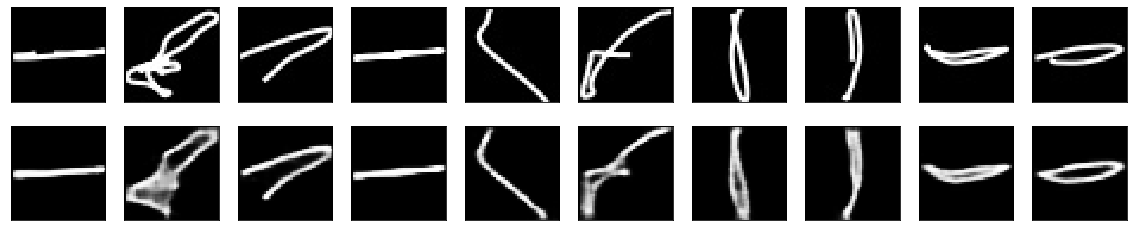

In [10]:
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(IMG_SIZE, IMG_SIZE))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(IMG_SIZE, IMG_SIZE))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [6]:
# Allow auto reload for util module
%load_ext autoreload
%autoreload 2
%aimport util
from util import load_and_process_classifier_data, load_and_process_autoencoder_data, load_and_build_encoded_change
%reload_ext autoreload

from one_svn import get_best_model
import importlib
importlib.reload(util)
#restructing encoder
encoder = Model(autoencoder.input, autoencoder.layers[6].output) #index from input to encoder




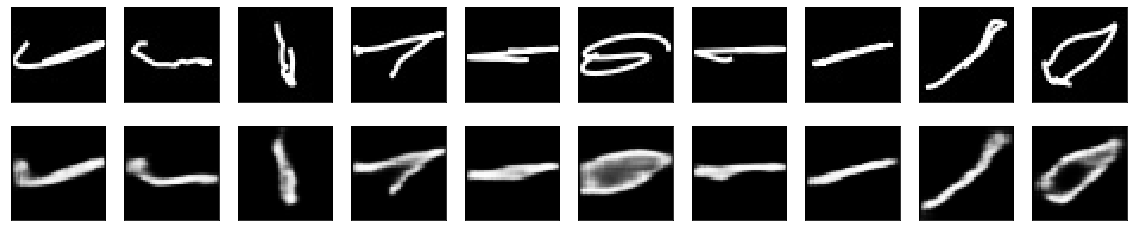

In [36]:
# Saving whole model
autoencoder.save('autoencoder_model_cole.h5')

# Loading whole model
from keras.models import load_model
model1 = load_model('autoencoder_model_cole.h5')

decoded_imgs = model1.predict(X_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(IMG_SIZE, IMG_SIZE))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(IMG_SIZE, IMG_SIZE))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [22]:
#X, y = load_and_process_classifier_data(IMG_PATH, encoder, ['3' , '5'])
X, y = load_and_build_encoded_change(IMG_PATH, encoder, ['3' , '5'])

X = np.asarray(X)
y = np.asarray(y)

print(X.shape)
print(y.shape)

'''
#ingore warning messages
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
#def get_best_model(X_set, y_label, kfold, scaler, use_sample_weight=False, multi_thread=True):    
kfold = 4
best_model = get_best_model(X, y, kfold, None, False, True)
'''


(808, 402)
(808,)


"\n#ingore warning messages\nimport warnings\nfrom sklearn.exceptions import UndefinedMetricWarning\nwarnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)\nwarnings.simplefilter(action='ignore', category=FutureWarning)\n#def get_best_model(X_set, y_label, kfold, scaler, use_sample_weight=False, multi_thread=True):    \nkfold = 4\nbest_model = get_best_model(X, y, kfold, None, False, True)\n"

In [23]:
import pickle
tuple_data = (X, y)
with open('/home/sysadm/Workspace/jupyter/data/encoded_3_5_4040_volt_diff_cole.dat', 'wb') as outfile:
        pickle.dump(tuple_data, outfile)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 256, 256, 16)      160       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 128, 128, 8)       1160      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 64, 64, 8)         584       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 32, 32, 8)         0         
Total para

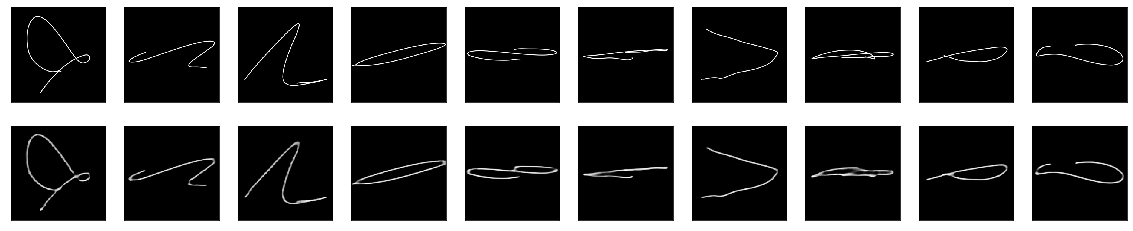

In [61]:
import matplotlib.pyplot as plt
ptr_encoder = Model(input_img, encoded)
#ptr_encoder = Model(autoencoder.input, autoencoder.layers[6].output)
ptr_decoder_input = Input(shape=(32, 32, 8))
ptr_x = ptr_decoder_input
for i in range(7,14):
    ptr_x = autoencoder.layers[i](ptr_x)
    
ptr_decoder = Model(ptr_decoder_input, ptr_x)

ptr_encoder.summary()
ptr_decoder.summary()

ptr_encoded_imgs = ptr_encoder.predict(X_test)
ptr_decoded_imgs = ptr_decoder.predict(ptr_encoded_imgs)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(IMG_SIZE, IMG_SIZE))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(ptr_decoded_imgs[i].reshape(IMG_SIZE, IMG_SIZE))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()